# IRIS 데이터 

In [10]:
import numpy as np 
import pandas as pd 

iris = pd.read_csv('data/iris3.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


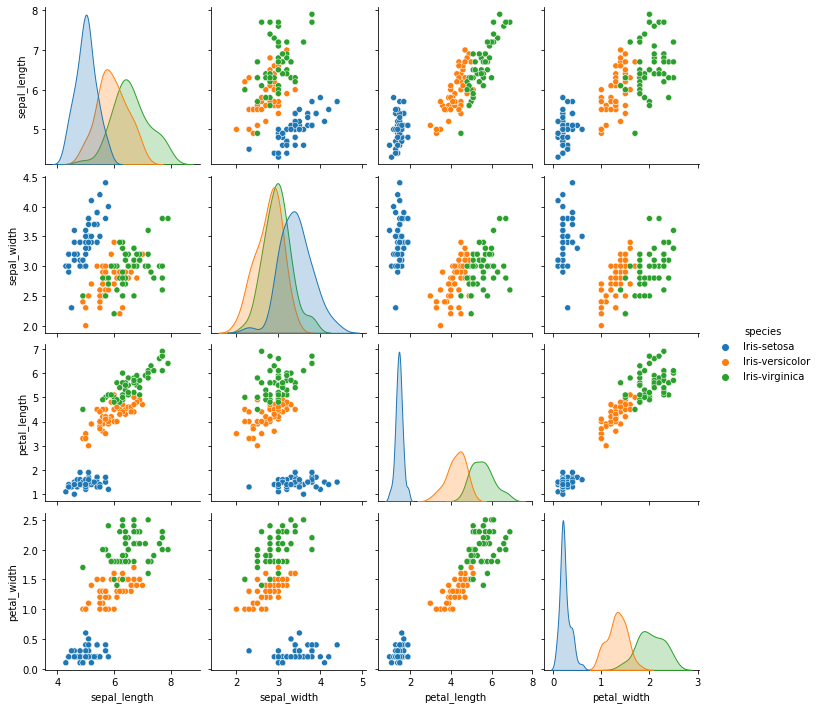

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(iris, hue='species')
plt.show()

In [26]:
# one-hot-encoding
X = iris.iloc[:,0:4]
y_obj = iris.iloc[:, 4]
y = pd.get_dummies(y_obj).values

In [44]:
# one-hot-encoding 
from sklearn.preprocessing import LabelEncoder 

e = LabelEncoder()
e.fit(y_obj)
y_transformed = e.transform(y_obj)
y_transformed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# one-hot-encoding 
import tensorflow as tf
y_encoded = tf.keras.utils.to_categorical(y_transformed)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [37]:
iris.shape

(150, 5)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [63]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 딥러닝 모델을 실행합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 딥러닝 모델을 학습시킵니다. 
history = model.fit(X_train, y_train, epochs=1500, batch_size=5, verbose=1)

# 딥러닝 모델을 평가합니다. 
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Epoch 1/1500
24/24 [==============================] - 4s 7ms/step - loss: 2.8179 - accuracy: 0.3667
Epoch 2/1500
24/24 [==============================] - 0s 8ms/step - loss: 1.9030 - accuracy: 0.3667
Epoch 3/1500
24/24 [==============================] - 0s 8ms/step - loss: 1.4339 - accuracy: 0.3583
Epoch 4/1500
24/24 [==============================] - 0s 8ms/step - loss: 1.1292 - accuracy: 0.3667
Epoch 5/1500
24/24 [==============================] - 0s 10ms/step - loss: 0.8822 - accuracy: 0.6000
Epoch 6/1500
24/24 [==============================] - 0s 7ms/step - loss: 0.7529 - accuracy: 0.6917
Epoch 7/1500
24/24 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.6917
Epoch 8/1500
24/24 [==============================] - 1s 27ms/step - loss: 0.6350 - accuracy: 0.6917
Epoch 9/1500
24/24 [==============================] - 0s 13ms/step - loss: 0.5988 - accuracy: 0.6917
Epoch 10/1500
24/24 [==============================] - 0s 13ms/step - loss: 0.5708 - accuracy: 0.

In [69]:
# 딥러닝 모델을 평가합니다. 
scores = model.evaluate(X_test, y_test)
print('%s: %.4f%%' % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 90ms/step - loss: 0.0096 - accuracy: 1.0000
accuracy: 100.0000%


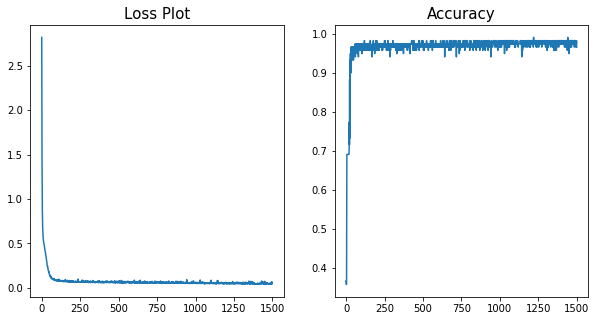

In [68]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.title('Loss Plot', size=15)

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.title('Accuracy', size=15)
plt.show()

In [72]:
#########################################################
# 12. 다중분류 - One Hot Encoding
# - 아이리스 품종 예측
# - One-hot encoding, - label encoder 사용
# - 활성화함수(Activation Function) : softmax
# - 비용함수(loss) : 'categorical_crossentropy'
#########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 데이터 입력
df = pd.read_csv('data/iris3.csv')

# 데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

# 문자열을 숫자로 변환 -> One Hot Encoding
e = LabelEncoder()
e.fit(Y_obj)  # 라벨인코더를 Y_obj 데이터에 적용
Y = e.transform(Y_obj) # 문자데이터(species)를 0, 1, 2로 변환
Y_encoded = tf.keras.utils.to_categorical(Y) # One Hot Encoding
Y_encoded  # [1, 0, 0], [0, 1, 0], [0, 0, 1] 형태

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
hist = model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))  #[0]:loss, [1]:accuracy

Epoch 1/50
150/150 [==============================] - 13s 35ms/step - loss: 0.7529 - accuracy: 0.6867
Epoch 2/50
150/150 [==============================] - 6s 38ms/step - loss: 0.5757 - accuracy: 0.6733
Epoch 3/50
150/150 [==============================] - 3s 21ms/step - loss: 0.5019 - accuracy: 0.7333
Epoch 4/50
150/150 [==============================] - 4s 25ms/step - loss: 0.4625 - accuracy: 0.7733
Epoch 5/50
150/150 [==============================] - 5s 30ms/step - loss: 0.4350 - accuracy: 0.8133
Epoch 6/50
150/150 [==============================] - 3s 20ms/step - loss: 0.4027 - accuracy: 0.8267
Epoch 7/50
150/150 [==============================] - 2s 15ms/step - loss: 0.3757 - accuracy: 0.8467
Epoch 8/50
150/150 [==============================] - 2s 14ms/step - loss: 0.3696 - accuracy: 0.9067
Epoch 9/50
150/150 [==============================] - 2s 15ms/step - loss: 0.3499 - accuracy: 0.8667
Epoch 10/50
150/150 [==============================] - 3s 22ms/step - loss: 0.3307 - accur

### 학습 검증

In [74]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

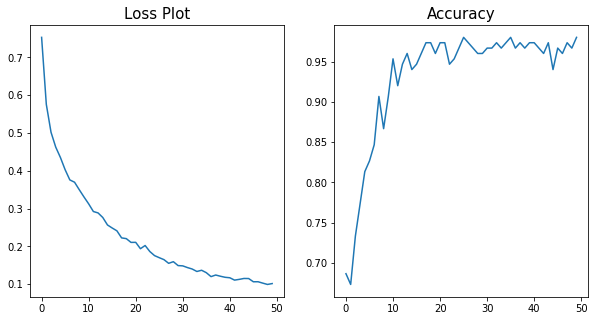

In [76]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(hist.history['loss'])
plt.title('Loss Plot', size=15)

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.title('Accuracy', size=15)
plt.show()

In [81]:
model.predict([[5.1, 3.5, 1.4, 0.2],
               [4.9, 3. , 1.4, 0.2],
               [4.7, 3.2, 1.3, 0.2],
               [4.6, 3.1, 1.5, 0.2]])

1/1 [==============================] - 1s 572ms/step


array([[9.9986935e-01, 1.3060156e-04, 5.1737157e-09],
       [9.9916887e-01, 8.3117967e-04, 5.5098170e-08],
       [9.9969649e-01, 3.0350304e-04, 2.3242482e-08],
       [9.9922132e-01, 7.7853166e-04, 7.5830833e-08]], dtype=float32)

In [86]:
softmax_result = model.predict(X[[1, 51, 101]])
softmax_result

1/1 [==============================] - 0s 109ms/step


array([[9.9916887e-01, 8.3117967e-04, 5.5098170e-08],
       [2.5876911e-04, 9.4629222e-01, 5.3449020e-02],
       [9.6782856e-07, 3.2241445e-02, 9.6775758e-01]], dtype=float32)

In [85]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [88]:
softmax_result.argmax(axis=1)

array([0, 1, 2], dtype=int64)

In [94]:
e.classes_[softmax_result.argmax(axis=1)]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [95]:
# 예측한 값 label 붙이기 
e.classes_[model.predict(X[[1, 51, 101]]).argmax(axis=1)]

1/1 [==============================] - 0s 203ms/step


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 독버섯 분류하기 
* 숫자가 아닌 문자로만 코딩된 데이터 

In [ ]:
# 데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

# 문자열을 숫자로 변환 -> One Hot Encoding
e = LabelEncoder()
e.fit(Y_obj)  # 라벨인코더를 Y_obj 데이터에 적용
Y = e.transform(Y_obj) # 문자데이터(species)를 0, 1, 2로 변환
Y_encoded = tf.keras.utils.to_categorical(Y) # One Hot Encoding
Y_encoded  # [1, 0, 0], [0, 1, 0], [0, 0, 1] 형태

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [101]:
mushrooms_cols = mushrooms.columns
mushrooms.iloc[:,0]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [115]:
import numpy as np 
import pandas as pd 

mushrooms = pd.read_csv('data/mushrooms.csv')

lbl_lst = []
lbl_enc = LabelEncoder()
for col in mushrooms.columns:
    lbl_enc.fit(mushrooms[col])
    mushrooms[col] = lbl_enc.transform(mushrooms[col])
    lbl_lst.append(lbl_enc.classes_)
    
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## 이중 분류

In [125]:
# 데이터 설정
X = mushrooms.iloc[:,1:]
y = mushrooms.iloc[:,0]

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 딥러닝 모델의 구조 결정
model = Sequential()
model.add(Dense(64, input_dim=22, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 모델 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 딥러닝 모델 학습
hist1 = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
130/130 [==============================] - 7s 15ms/step - loss: 0.3379 - accuracy: 0.8638
Epoch 2/100
130/130 [==============================] - 2s 15ms/step - loss: 0.1697 - accuracy: 0.9343
Epoch 3/100
130/130 [==============================] - 2s 19ms/step - loss: 0.1024 - accuracy: 0.9658
Epoch 4/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0626 - accuracy: 0.9823
Epoch 5/100
130/130 [==============================] - 3s 20ms/step - loss: 0.0410 - accuracy: 0.9889
Epoch 6/100
130/130 [==============================] - 2s 18ms/step - loss: 0.0265 - accuracy: 0.9934
Epoch 7/100
130/130 [==============================] - 2s 17ms/step - loss: 0.0178 - accuracy: 0.9965
Epoch 8/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0136 - accuracy: 0.9975
Epoch 9/100
130/130 [==============================] - 2s 12ms/step - loss: 0.0094 - accuracy: 0.9991
Epoch 10/100
130/130 [==============================] - 2s 12ms/step - loss: 0.006

In [126]:
# 딥러닝 모델 평가 
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

51/51 [==============================] - 3s 18ms/step - loss: 1.3413e-06 - accuracy: 1.0000
accuracy: 100.00%


## 다중 분류

In [133]:
# 데이터 설정
X = mushrooms.iloc[:,1:]
y = mushrooms.iloc[:,0]

# one-hot-encoding
import tensorflow as tf  
y_oh_enc = tf.keras.utils.to_categorical(y)

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_oh_enc, test_size=0.2, random_state=1)

# 딥러닝 모델의 구조 결정
model = Sequential()
model.add(Dense(64, input_dim=22, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 딥러닝 모델 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 딥러닝 모델 학습
hist2 = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
130/130 [==============================] - 7s 18ms/step - loss: 0.3124 - accuracy: 0.8709
Epoch 2/100
130/130 [==============================] - 2s 19ms/step - loss: 0.1381 - accuracy: 0.9474
Epoch 3/100
130/130 [==============================] - 2s 14ms/step - loss: 0.0771 - accuracy: 0.9771
Epoch 4/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0450 - accuracy: 0.9885
Epoch 5/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0237 - accuracy: 0.9966
Epoch 6/100
130/130 [==============================] - 3s 20ms/step - loss: 0.0142 - accuracy: 0.9986
Epoch 7/100
130/130 [==============================] - 2s 17ms/step - loss: 0.0098 - accuracy: 0.9989
Epoch 8/100
130/130 [==============================] - 2s 17ms/step - loss: 0.0071 - accuracy: 0.9995
Epoch 9/100
130/130 [==============================] - 2s 16ms/step - loss: 0.0048 - accuracy: 0.9994
Epoch 10/100
130/130 [==============================] - 2s 14ms/step - loss: 0.003

In [134]:
# 딥러닝 모델 평가 
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))


51/51 [==============================] - 2s 8ms/step - loss: 6.2464e-07 - accuracy: 1.0000
accuracy: 100.00%


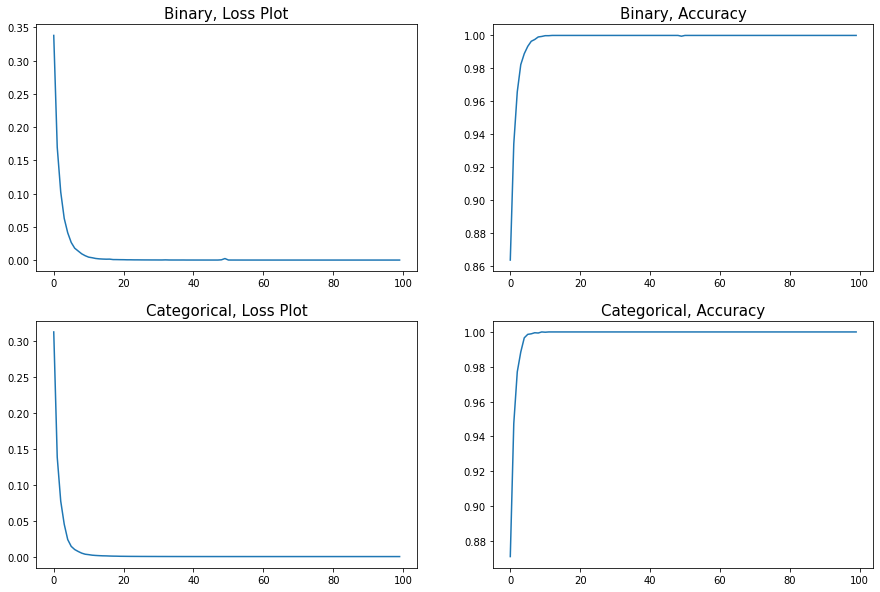

In [135]:
# 그림 그리기 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(hist1.history['loss'])
plt.title('Binary, Loss Plot', size=15)

plt.subplot(222)
plt.plot(hist1.history['accuracy'])
plt.title('Binary, Accuracy', size=15)

plt.subplot(223)
plt.plot(hist2.history['loss'])
plt.title('Categorical, Loss Plot', size=15)

plt.subplot(224)
plt.plot(hist2.history['accuracy'])
plt.title('Categorical, Accuracy', size=15)

plt.show()


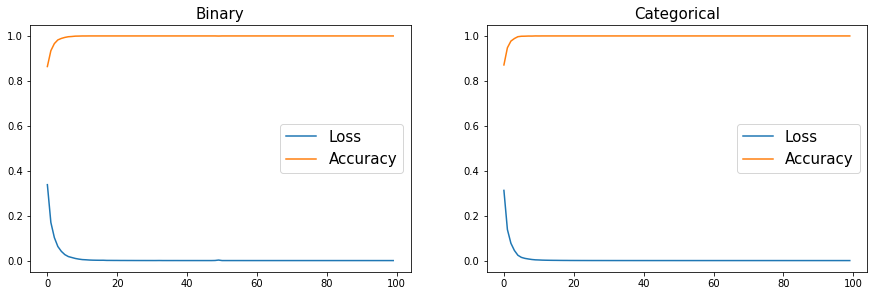

In [164]:
# Plot2
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(hist1.history['loss'], label='Loss')
plt.plot(hist1.history['accuracy'], label='Accuracy')
plt.title('Binary', size=15)
plt.legend(fontsize=15)

plt.subplot(222)
plt.plot(hist2.history['loss'], label='Loss')
plt.plot(hist2.history['accuracy'], label='Accuracy')
plt.title('Categorical', size=15)
plt.legend(fontsize=15)

plt.show()

### 검증

In [ ]:
import numpy as np 
import pandas as pd 

mushrooms = pd.read_csv('data/mushrooms.csv')

lbl_lst = []
lbl_enc = LabelEncoder()
for col in mushrooms.columns:
    lbl_enc.fit(mushrooms[col])
    mushrooms[col] = lbl_enc.transform(mushrooms[col])
    lbl_lst.append(lbl_enc.classes_)
    
mushrooms

In [140]:
lbl_lst[0][model.predict(X_test).argmax(axis=1)]


51/51 [==============================] - 1s 11ms/step


array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [158]:
# 예측한 값 label 붙이기 
df_res = pd.DataFrame({'Predict_y' : lbl_lst[0][model.predict(X_test).argmax(axis=1)],
                       'True_y' : lbl_lst[0][y_test.argmax(axis=1)]})
df_res['isEqual'] = df_res['Predict_y'] == df_res['True_y']
df_res['isEqual'].value_counts() # 다 맞춘 것을 알 수 있다. 

51/51 [==============================] - 1s 9ms/step


True    1625
Name: isEqual, dtype: int64

# Sonar

In [243]:
import pandas as pd 
import numpy as np 

sonar = pd.read_csv('data/sonar.csv', header=None)
sonar

# 데이터 설정 
X = sonar.iloc[:, :-1].astype(float) # Tensorflow 오류나는 경우 있음 astype(float) 과정 필요함.
y = sonar.iloc[:,-1]

# 숫자로 인코딩
lbl_enc = LabelEncoder()
lbl_enc.fit(y)
y_enc = lbl_enc.transform(y)

# one-hot-encoding
import tensorflow as tf  

y_oh_enc = tf.keras.utils.to_categorical(y_enc)

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_oh_enc, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 딥러닝 모델의 구조 결정
model = Sequential()
model.add(Dense(256, input_dim=60, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 딥러닝 모델 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 딥러닝 모델 학습
hist = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1,
                 validation_data=(X_test, y_test))

(166, 60) (42, 60) (166, 2) (42, 2)
Epoch 1/200
17/17 [==============================] - 6s 164ms/step - loss: 0.6776 - accuracy: 0.5964 - val_loss: 0.6712 - val_accuracy: 0.4762
Epoch 2/200
17/17 [==============================] - 1s 42ms/step - loss: 0.6227 - accuracy: 0.6145 - val_loss: 0.5861 - val_accuracy: 0.7619
Epoch 3/200
17/17 [==============================] - 1s 49ms/step - loss: 0.5651 - accuracy: 0.6988 - val_loss: 0.5525 - val_accuracy: 0.7619
Epoch 4/200
17/17 [==============================] - 1s 46ms/step - loss: 0.4989 - accuracy: 0.7590 - val_loss: 0.5396 - val_accuracy: 0.7381
Epoch 5/200
17/17 [==============================] - 1s 35ms/step - loss: 0.4500 - accuracy: 0.7952 - val_loss: 0.5103 - val_accuracy: 0.7619
Epoch 6/200
17/17 [==============================] - 1s 38ms/step - loss: 0.3923 - accuracy: 0.8313 - val_loss: 0.4644 - val_accuracy: 0.7381
Epoch 7/200
17/17 [==============================] - 0s 29ms/step - loss: 0.4011 - accuracy: 0.8133 - val_loss:

In [247]:
# 딥러닝 모델 평가 
# Train dataset 
print(hist.history.keys())
# scores = model.evaluate(X_train, y_train)
# print('Train Accuracy > %s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

# scores = model.evaluate(X_test, y_test)
# print('Test Accuracy > %s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


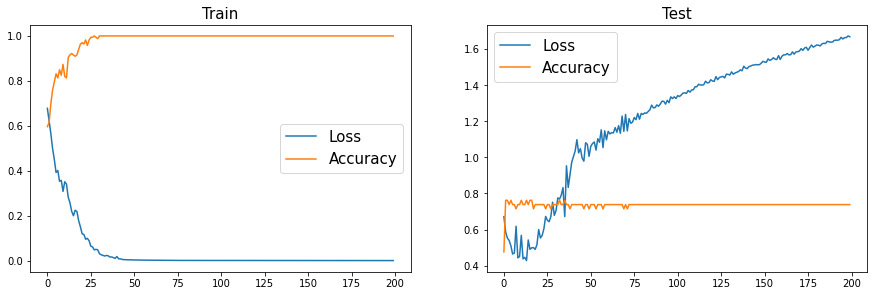

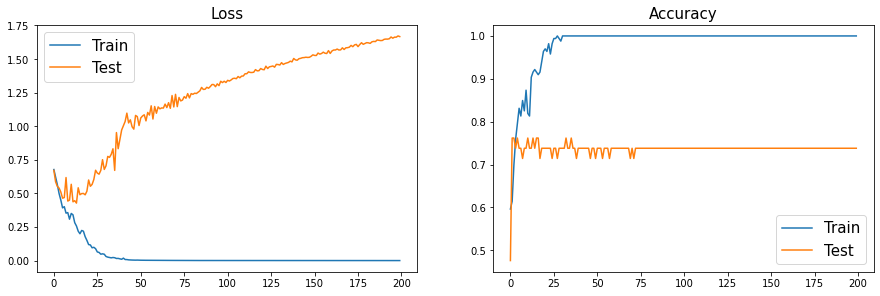

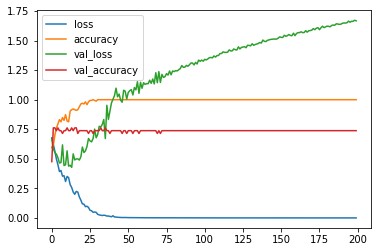

In [252]:
# Plot2
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.title('Train', size=15)
plt.legend(fontsize=15)

plt.subplot(222)
plt.plot(hist.history['val_loss'], label='Loss')
plt.plot(hist.history['val_accuracy'], label='Accuracy')
plt.title('Test', size=15)
plt.legend(fontsize=15)

plt.show()

# Plot3
fig = plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.title('Loss', size=15)
plt.legend(fontsize=15)

plt.subplot(222)
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Test')
plt.title('Accuracy', size=15)
plt.legend(fontsize=15)

plt.show()

df_history = pd.DataFrame(hist.history)
df_history.plot()
plt.show()

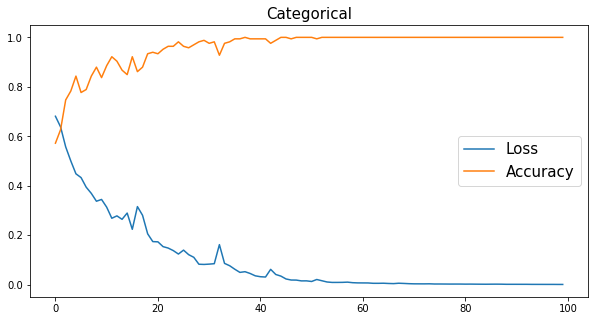

In [237]:
fig = plt.figure(figsize=(10, 5))

plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.title('Categorical', size=15)
plt.legend(fontsize=15)
plt.show()

In [234]:
# 예측한 값 label 붙이기 
df_res = pd.DataFrame({'Predict_y' : lbl_enc.classes_[model.predict(X_test).argmax(axis=1)],
                       'True_y' : lbl_enc.classes_[y_test.argmax(axis=1)]})
df_res['isEqual'] = df_res['Predict_y'] == df_res['True_y']
print(df_res['isEqual'].value_counts()) # 35 / (35 + 7) * 100 = 83.33

df_res[df_res['isEqual'] == False]

2/2 [==============================] - 1s 10ms/step
True     31
False    11
Name: isEqual, dtype: int64


,Predict_y,True_y,isEqual
1,R,M,False
2,R,M,False
10,M,R,False
11,M,R,False
15,R,M,False
18,M,R,False
22,M,R,False
27,M,R,False
30,R,M,False
32,M,R,False


In [198]:
11 / (35 + 7) * 100

83.33333333333334

## 모델 저장

In [254]:
# 모델 저장 
model.save('data/model/sonar_model.hdf5')
type(model)

keras.engine.sequential.Sequential

In [256]:
from tensorflow.keras.models import Sequential, load_model 
model1 = load_model('data/model/sonar_model.hdf5')
model1.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 256)               15616     
                                                                 
 dense_148 (Dense)           (None, 64)                16448     
                                                                 
 dense_149 (Dense)           (None, 16)                1040      
                                                                 
 dense_150 (Dense)           (None, 2)                 34        
                                                                 
Total params: 33,138
Trainable params: 33,138
Non-trainable params: 0
_________________________________________________________________


In [263]:
print(lbl_enc.classes_[model1.predict(X_test[:5]).argmax(axis=1)])
print(lbl_enc.classes_[y_test[:5].argmax(axis=1)])


1/1 [==============================] - 0s 481ms/step
['M' 'R' 'R' 'M' 'R']
['M' 'M' 'M' 'M' 'R']


## k-fold cross validation

In [286]:
from sklearn.model_selection import KFold 
k = 5
kfold = KFold(n_splits=k, shuffle=True)
acc_score = []

model1 = Sequential()
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y_oh_enc[train_index], y_oh_enc[test_index]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    # 딥러닝 모델 설정 
    model1.add(Dense(64, input_dim=60, activation='relu'))
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(2, activation='softmax'))
    
    # 딥러닝 모델 실행
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 딥러닝 모델 학습
    hist = model1.fit(X_train, y_train, epochs=30, batch_size=10, verbose=1)
    
    # 검증
    accuracy = model1.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)

Epoch 1/30
17/17 [==============================] - 5s 21ms/step - loss: 0.6866 - accuracy: 0.5422
Epoch 2/30
17/17 [==============================] - 0s 18ms/step - loss: 0.6662 - accuracy: 0.5361
Epoch 3/30
17/17 [==============================] - 0s 13ms/step - loss: 0.6451 - accuracy: 0.5663
Epoch 4/30
17/17 [==============================] - 0s 17ms/step - loss: 0.6208 - accuracy: 0.6867
Epoch 5/30
17/17 [==============================] - 0s 13ms/step - loss: 0.5934 - accuracy: 0.7470
Epoch 6/30
17/17 [==============================] - 0s 25ms/step - loss: 0.5654 - accuracy: 0.7530
Epoch 7/30
17/17 [==============================] - 0s 20ms/step - loss: 0.5386 - accuracy: 0.7831
Epoch 8/30
17/17 [==============================] - 0s 13ms/step - loss: 0.5124 - accuracy: 0.7590
Epoch 9/30
17/17 [==============================] - 0s 14ms/step - loss: 0.4883 - accuracy: 0.8373
Epoch 10/30
17/17 [==============================] - 0s 15ms/step - loss: 0.4820 - accuracy: 0.7530
Epoch 11/

In [292]:
# k번 실시된 정확도의 평균 
print(acc_score)
print('accuracy mean : %.04f' % (np.array(acc_score).sum()/ k))

[0.761904776096344, 0.9047619104385376, 0.9285714030265808, 0.9512194991111755, 0.9024389982223511]
accuracy mean : 0.8898
